In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
import re

In [5]:
# Load the dataset
df = pd.read_csv('immoscout/final_scraping_2023-10-13_13-55-23.csv')

In [6]:
print(df.head())

   Unnamed: 0                         H3_Data  \
0           0   2,5 Zimmer, 80 m², CHF 2145.—   
1           1   2,5 Zimmer, 54 m², CHF 1960.—   
2           2  3,5 Zimmer, 105 m², CHF 1950.—   
3           3  3,5 Zimmer, 120 m², CHF 2625.—   
4           4  5,5 Zimmer, 159 m², CHF 3000.—   

                                    Address  \
0             Bungert 6, 8909 Zwillikon, ZH   
1             Bungert 6, 8909 Zwillikon, ZH   
2  Albisstrasse 5, 8915 Hausen am Albis, ZH   
3                  8915 Hausen am Albis, ZH   
4         Rainstrasse 25, 8908 Hedingen, ZH   

                                   Description_Title Description_Content  \
0                        «Moderne 2.5-Zimmerwohnung»                 NaN   
1                        «Moderne 2.5-Zimmerwohnung»                 NaN   
2  «Attraktive Wohnung bietet einem Paar optimale...                 NaN   
3  «MÖBLIERT, TEMPORÄR: 3½ ZIMMER-HAUS IN HAUSEN ...                 NaN   
4     «Grosszügige 5.5 Zi Dachwohnung mit 

In [7]:
def clean_text(text):
    if pd.isna(text):
        return "-"
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-ZäöüÄÖÜ\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_text'] = df['Description_Content'].apply(clean_text)


In [9]:
df.cleaned_text.head(n=30)

0                                                     -
1                                                     -
2                                                     -
3                                                     -
4                                                     -
5                                                     -
6                                                     -
7                                                     -
8                                                     -
9                                                     -
10                                                    -
11    diese moderne zimmeretagenwohnung in obfelden ...
12                                                    -
13                                                    -
14                                                    -
15    in wettswil wartet dieser wohntraum in idyllis...
16    ein generationenübergreifendes quartier umgebe...
17                                              

In [11]:
nltk.download('punkt')
df['tokens'] = df['cleaned_text'].apply(nltk.word_tokenize)


[nltk_data] Downloading package punkt to /Users/pascal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
nltk.download('stopwords')
stop_words = set(stopwords.words('german'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words and len(word) > 1])


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pascal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
print(stop_words)

{'von', 'unsere', 'gegen', 'waren', 'desselben', 'gewesen', 'der', 'anderr', 'deinen', 'ins', 'allem', 'meines', 'so', 'über', 'dann', 'ihrer', 'seinem', 'keinem', 'doch', 'oder', 'es', 'er', 'solchen', 'werde', 'dazu', 'diese', 'am', 'einem', 'deines', 'mit', 'werden', 'alles', 'manchem', 'denselben', 'auf', 'will', 'sonst', 'unser', 'deiner', 'anderm', 'seines', 'anderer', 'welches', 'des', 'andere', 'anderen', 'dich', 'unserem', 'dasselbe', 'warst', 'musste', 'aber', 'weg', 'bist', 'solches', 'einer', 'nicht', 'an', 'andern', 'mancher', 'hier', 'man', 'wird', 'ihr', 'solche', 'diesen', 'alle', 'haben', 'etwas', 'hin', 'ohne', 'bis', 'keine', 'einmal', 'jenen', 'einige', 'nun', 'ander', 'unseren', 'vom', 'ein', 'sein', 'wenn', 'jedem', 'in', 'kann', 'mein', 'nichts', 'dass', 'sie', 'uns', 'dieses', 'unseres', 'wirst', 'würde', 'dies', 'euren', 'ihre', 'einiges', 'hatte', 'als', 'eine', 'ist', 'eurer', 'seine', 'können', 'nur', 'jedes', 'euer', 'jetzt', 'welche', 'sind', 'dem', 'einig

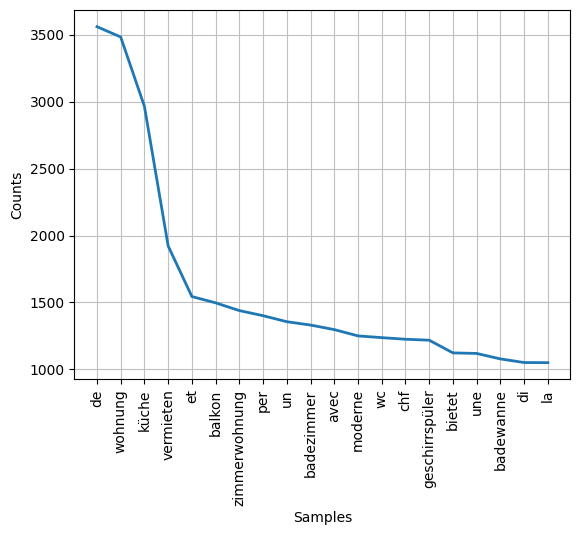

<Axes: xlabel='Samples', ylabel='Counts'>

In [14]:
all_words = [word for tokens in df['tokens'] for word in tokens]
word_freq = nltk.FreqDist(all_words)
word_freq.plot(20, cumulative=False)

In [15]:
df['bigrams'] = df['tokens'].apply(lambda x: list(ngrams(x, 2)))

In [17]:
print(df.bigrams.head(n=30))

0                                                    []
1                                                    []
2                                                    []
3                                                    []
4                                                    []
5                                                    []
6                                                    []
7                                                    []
8                                                    []
9                                                    []
10                                                   []
11    [(moderne, zimmeretagenwohnung), (zimmeretagen...
12                                                   []
13                                                   []
14                                                   []
15    [(wettswil, wartet), (wartet, wohntraum), (woh...
16    [(generationenübergreifendes, quartier), (quar...
17                                              

In [18]:
df['trigrams'] = df['tokens'].apply(lambda x: list(ngrams(x, 3)))

In [19]:
print(df.trigrams.head(n=30))

0                                                    []
1                                                    []
2                                                    []
3                                                    []
4                                                    []
5                                                    []
6                                                    []
7                                                    []
8                                                    []
9                                                    []
10                                                   []
11    [(moderne, zimmeretagenwohnung, obfelden), (zi...
12                                                   []
13                                                   []
14                                                   []
15    [(wettswil, wartet, wohntraum), (wartet, wohnt...
16    [(generationenübergreifendes, quartier, umgebe...
17                                              

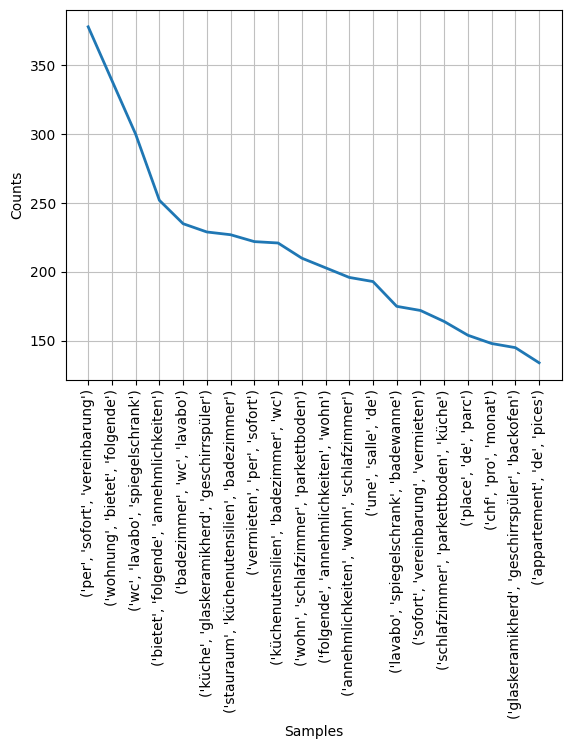

<Axes: xlabel='Samples', ylabel='Counts'>

In [20]:
trigrams = [word for tokens in df['trigrams'] for word in tokens]
word_freq = nltk.FreqDist(trigrams)
word_freq.plot(20, cumulative=False)

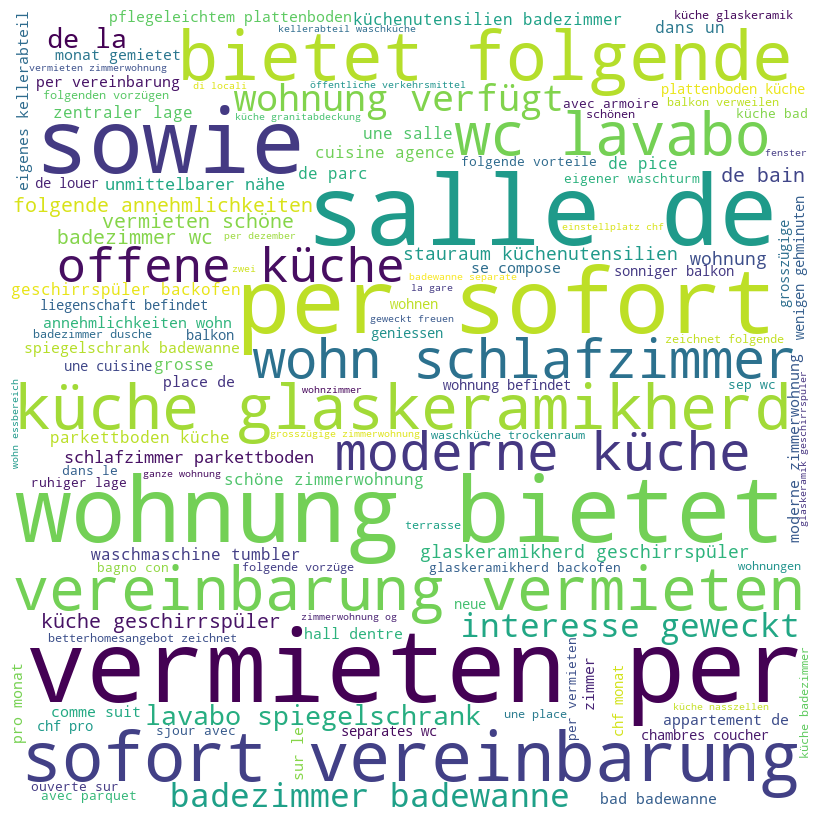

In [21]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(' '.join(all_words))

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [22]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(' '.join(trigrams))

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

TypeError: sequence item 0: expected str instance, tuple found

In [23]:
def join_ngrams(row):
    bigrams_str = ['_'.join(bigram) for bigram in row['bigrams']]
    trigrams_str = ['_'.join(trigram) for trigram in row['trigrams']]
    return ' '.join(bigrams_str + trigrams_str)

df['ngrams_combined'] = df.apply(join_ngrams, axis=1)

def join_ngrams(row):
    # Keep only trigrams in the string format
    trigrams_str = ['_'.join(trigram) for trigram in row['trigrams']]
    # Join all trigrams into a single string with spaces separating each trigram
    return ' '.join(trigrams_str)

# Apply the modified function to create a combined string of trigrams
df['trigrams_combined'] = df.apply(join_ngrams, axis=1)


# Encode the ngrams
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['trigrams_combined'])
y = df['preis'].apply(lambda x: 1 if x > 2500 else 0)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train XGBoost classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94      4962
           1       0.47      0.01      0.02       648

    accuracy                           0.88      5610
   macro avg       0.68      0.50      0.48      5610
weighted avg       0.84      0.88      0.83      5610

[[4954    8]
 [ 641    7]]


In [24]:
# To show the most important features from the XGBoost model, we need to have the model trained.
# Assuming that the model is already trained, we will extract and display the feature importances.

# Check if the model has been trained and the features are available
if 'xgb' in locals() and 'vectorizer' in locals():
    # Get feature importances from the model
    feature_importances = xgb.feature_importances_
    
    # Get feature names
    feature_names = vectorizer.get_feature_names_out()
    
    # Create a DataFrame to display feature importances
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    
    # Sort by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # Display the top 10 features
    top_features = feature_importance_df.head(10)
else:
    top_features = "Model and feature data are not available. Please ensure the model is trained and features are extracted."

top_features



,Feature,Importance
20295,ceramic_stove_microwave,0.024953
22395,comfortable_double_bed,0.019408
29375,dining_table_and,0.018390
13659,bedroom_apartment_is,0.017430
30663,double_bed_and,0.016459
94581,salle_de_douche,0.015380
28103,dentre_avec_armoire,0.013902
94696,salles_de_bains,0.012794
34614,einkaufsmöglichkeiten_befinden_unmittelbarer,0.012455
105407,sur_le_lac,0.012017


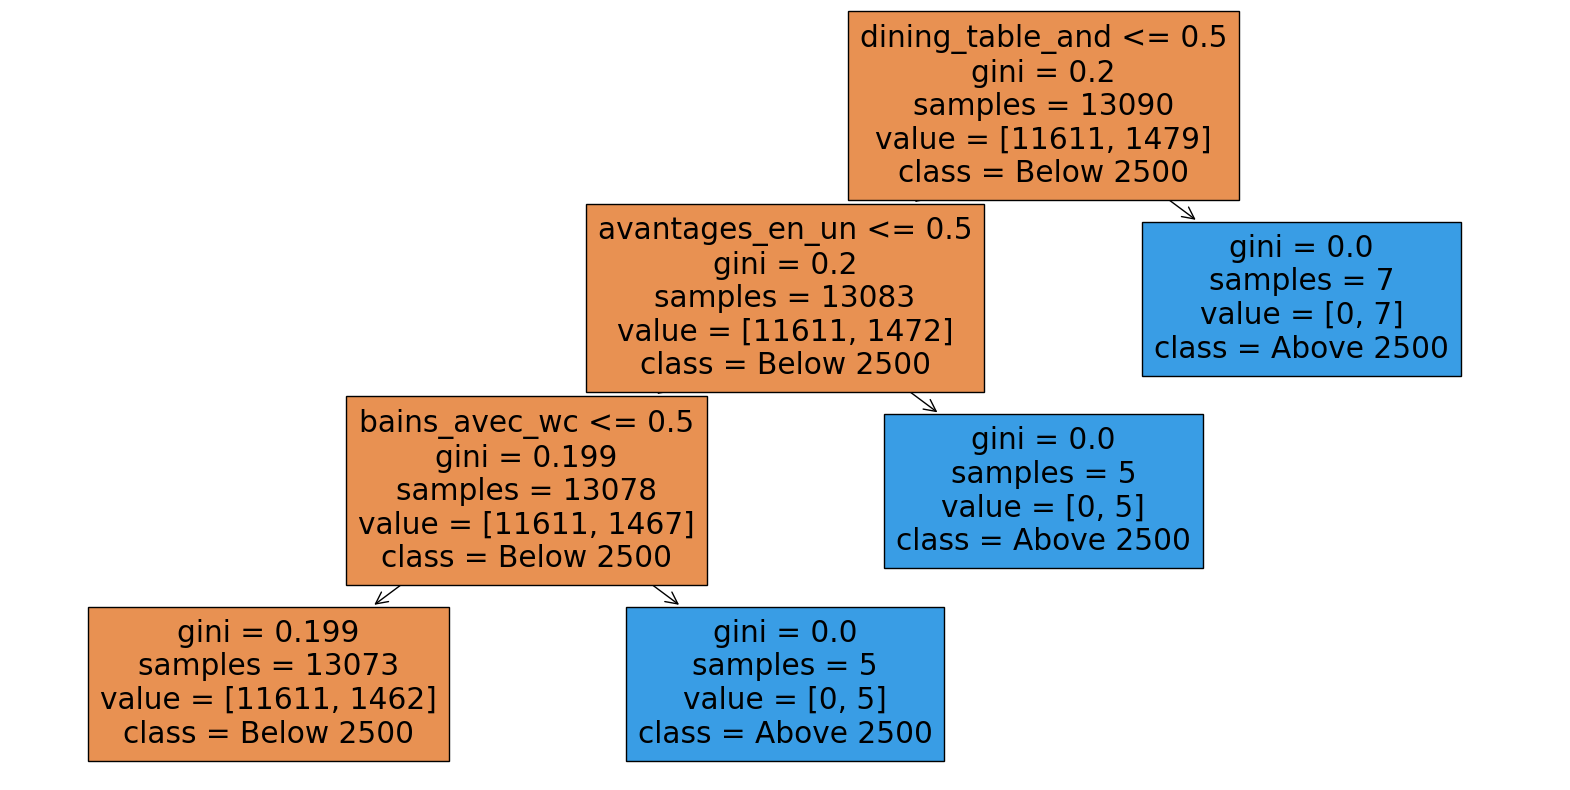

In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Assuming the data is already prepared for training (features X and target y)
# Check if the data is available
if 'X_train' in locals() and 'y_train' in locals():
    # Initialize and train a decision tree classifier
    decision_tree = DecisionTreeClassifier(max_depth=3)  # Limiting depth for visualization purposes
    decision_tree.fit(X_train, y_train)

    # Plot the decision tree
    plt.figure(figsize=(20,10))
    plot_tree(decision_tree, filled=True, feature_names=vectorizer.get_feature_names_out(), class_names=['Below 2500', 'Above 2500'])
    plt.show()
else:
    print("Training data is not available. Please ensure the data is loaded and preprocessed correctly.")



In [56]:
X_Train

NameError: name 'X_Train' is not defined

In [57]:
X

<18700x131349 sparse matrix of type '<class 'numpy.int64'>'
	with 207229 stored elements in Compressed Sparse Row format>